In [1]:
import pickle
with open('forecast_model.pckl', 'rb') as fin:
    m2 = pickle.load(fin)

In C:\Users\adhar\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adhar\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adhar\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\adhar\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adhar\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
import pandas as pd 
from fbprophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
future = m2.make_future_dataframe(periods=7)
forecast = m2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,ds,yhat,yhat_lower,yhat_upper
566,2011-10-27,43225.822249,23852.997803,61108.420968
567,2011-10-28,34567.324282,15662.741916,53194.632660
568,2011-10-29,18185.435200,247.553215,37574.888866
569,2011-10-30,21425.990373,3018.146118,39766.482536
570,2011-10-31,39740.573188,21603.956327,58504.334233


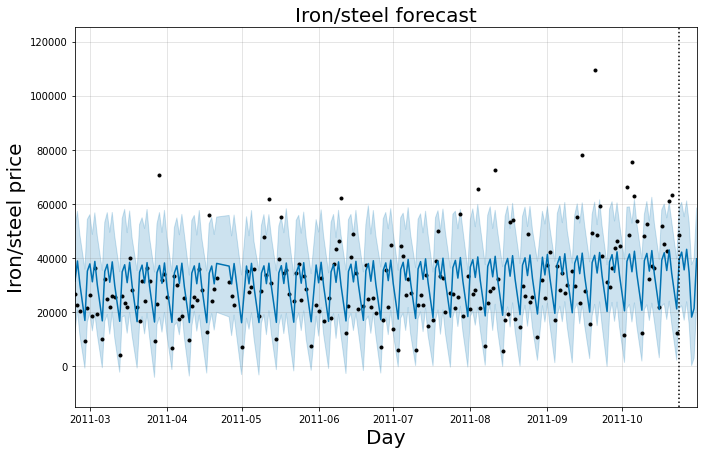

In [6]:
from datetime import datetime, timedelta
fig1 = m2.plot(forecast)
#datenow = datetime.now()
datenow = datetime(2011, 10, 24)
dateend = datenow + timedelta(days=7)
datestart = dateend - timedelta(days=250)
plt.xlim([datestart, dateend])
plt.title("Iron/steel forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("Iron/steel price", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

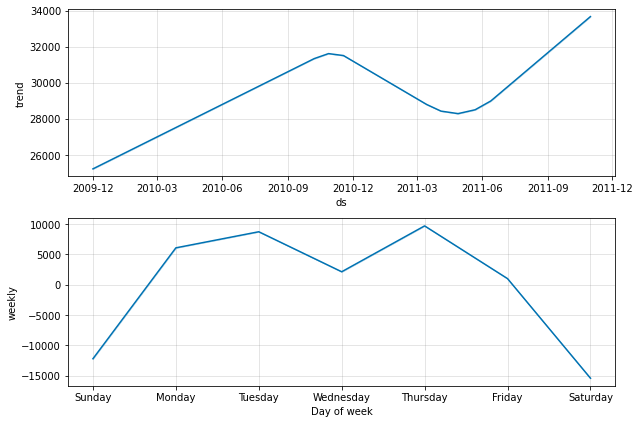

In [8]:
fig2 = m2.plot_components(forecast)

In [9]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='90 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

NameError: name 'm' is not defined